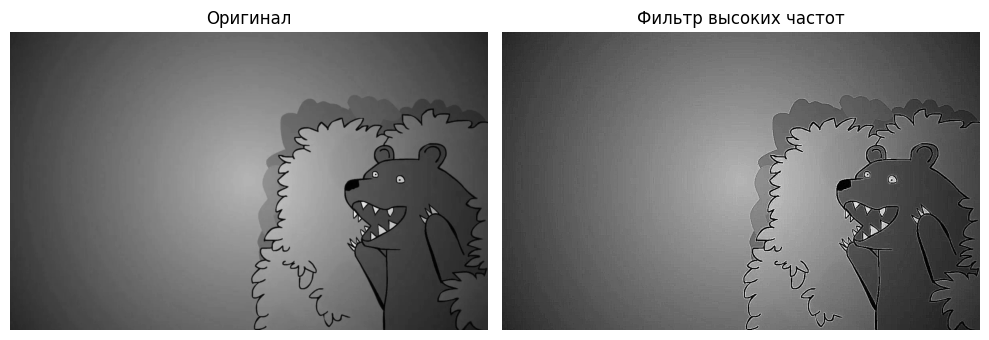

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

# Шаг 2: Загрузка и нормализация изображения
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#Робертс
roberts_cross_v = np.array([[1, 0],
                            [0, -1]], dtype=int)
roberts_cross_h = np.array([[0, 1],
                            [-1, 0]], dtype=int)

vertical = ndimage.convolve(img_normalized, roberts_cross_v)
horizontal = ndimage.convolve(img_normalized, roberts_cross_h)

edged_roberts = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_roberts = np.uint8(edged_roberts / edged_roberts.max() * 255)

#Превитт
prewitt_h = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]], dtype=int)

prewitt_v = np.array([[ 1,  1,  1],
                      [ 0,  0,  0],
                      [-1, -1, -1]], dtype=int)

horizontal_prewitt = cv2.filter2D(img_normalized, -1, prewitt_h)
vertical_prewitt = cv2.filter2D(img_normalized, -1, prewitt_v)

edged_prewitt = np.sqrt(np.square(horizontal_prewitt) + np.square(vertical_prewitt))
edged_prewitt = np.uint8(edged_prewitt / edged_prewitt.max() * 255)

#Собель
sobelx = cv2.Sobel(img_normalized, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_normalized, cv2.CV_64F, 0, 1, ksize=3)

edged_sobel = np.sqrt(sobelx**2 + sobely**2)
edged_sobel = np.uint8(edged_sobel / edged_sobel.max() * 255)

#Лаплас
edged_laplacian = cv2.Laplacian(img_normalized, cv2.CV_64F)
edged_laplacian = np.uint8(np.absolute(edged_laplacian))

#Пересечение по нулям
img_blurred = cv2.GaussianBlur(img_normalized, (3, 3), 0)
edged_log = cv2.Laplacian(img_blurred, cv2.CV_64F)
edged_log = np.uint8(np.absolute(edged_log))

#Канни
edged_canny = cv2.Canny(img_normalized, 100, 200)

#Фильтр высоких частот
high_pass_kernel = np.array([[ -1, -1, -1],
                             [ -1,  9, -1],
                             [ -1, -1, -1]])

high_pass_filtered = cv2.filter2D(img_normalized, -1, high_pass_kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_normalized, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_filtered, cmap='gray')
plt.title('Фильтр высоких частот')
plt.axis('off')

plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

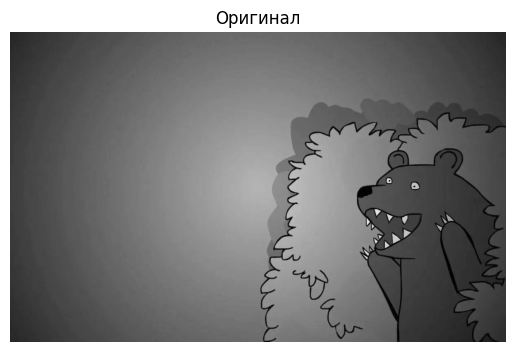

In [50]:
plt.imshow(img_normalized, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

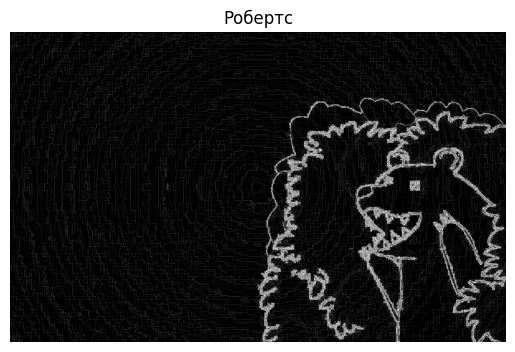

In [51]:
plt.imshow(edged_roberts, cmap='gray')
plt.title('Робертс')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

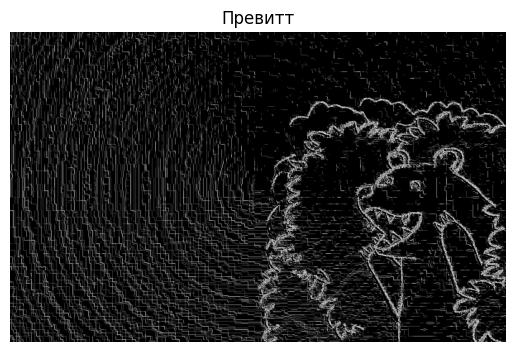

In [52]:
plt.imshow(edged_prewitt, cmap='gray')
plt.title('Превитт')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

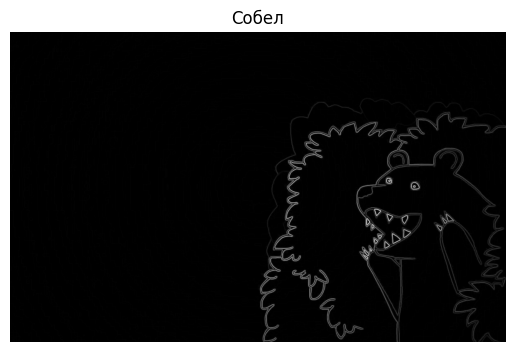

In [43]:
plt.imshow(edged_sobel, cmap='gray')
plt.title('Собел')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

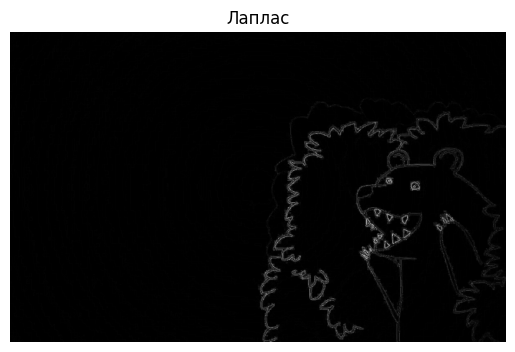

In [44]:
plt.imshow(edged_laplacian, cmap='gray')
plt.title('Лаплас')
plt.axis('off')


(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

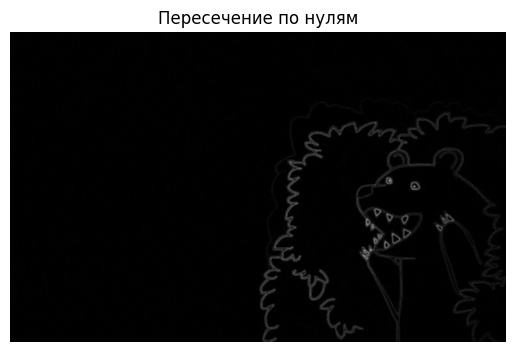

In [47]:
plt.imshow(edged_log, cmap='gray')
plt.title('Пересечение по нулям')
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

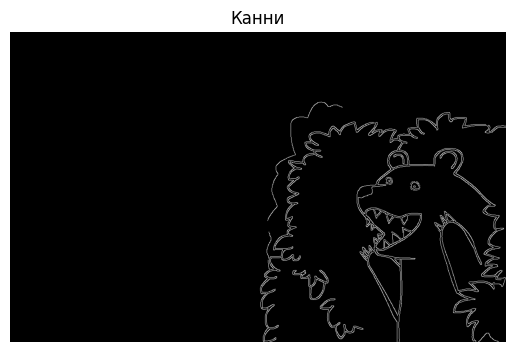

In [46]:
plt.imshow(edged_canny, cmap='gray')
plt.title('Канни')
plt.axis('off')